<a href="https://colab.research.google.com/github/RJuro/CALDISS-EDA/blob/master/CALDISS_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip3 install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 24.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
!pip3 install hdbscan

# A quick dive into nomad geography and the gig-economy
## CALDISS - EDA Workshop, 20/3 2019, Roman Jurowetzki

In this workshop you will learn how to work with dimensionality reduction and clustering techniques. We will have a look at data that comes in slightly different shapes and how we can aggregate it to identify latent patterns in a population.

We will use a dataset on cities worldwide to get familiar with dimensionality reduction.

Then, we will use a dataset of jobs performed by 1000 freelance-workers.

![](https://www.phocuswire.com/uploadedimages/uploads/2013/04/global-routes.jpg?width=800&height=400&scale=both&mode=crop)

There are many many ways to do similar things in Python and despite that we are not working with Natural Language Processing, we will use some tools and packages from this domeain for our analysis.

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np

import gensim
from gensim.corpora.dictionary import Dictionary

In [0]:
cities = pd.read_csv('https://github.com/SDS-AAU/M1-2018/raw/master/data/nomad_cities.csv', sep='\t')

In [0]:
vars_analysis = ["cost_nomad", "cost_coworking", "cost_expat", "coffee_in_cafe", "cost_beer", # costs
          "places_to_work", "free_wifi_available", "internet_speed", # work
          "freedom_score", "peace_score", "safety", "fragile_states_index", "press_freedom_index", # safety & freedom
          "female_friendly", "lgbt_friendly", "friendly_to_foreigners", "racism", # friendly
          "leisure","life_score","nightlife","weed"] # fun 

vars_descr = ["nomad_score", "cost_nomad", "places_to_work", "freedom_score", "friendly_to_foreigners", "life_score"]

In [0]:
data = cities[vars_analysis]

In [0]:
descr = cities[vars_descr]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 21 columns):
cost_nomad                781 non-null int64
cost_coworking            781 non-null float64
cost_expat                781 non-null int64
coffee_in_cafe            781 non-null float64
cost_beer                 781 non-null float64
places_to_work            781 non-null float64
free_wifi_available       781 non-null float64
internet_speed            781 non-null int64
freedom_score             781 non-null object
peace_score               781 non-null object
safety                    781 non-null float64
fragile_states_index      781 non-null object
press_freedom_index       781 non-null object
female_friendly           781 non-null float64
lgbt_friendly             781 non-null float64
friendly_to_foreigners    781 non-null float64
racism                    781 non-null float64
leisure                   781 non-null float64
life_score                781 non-null float64
nightlife   

In [7]:
print(data['peace_score'].unique())
print(data['freedom_score'].unique())
print(data['fragile_states_index'].unique())
print(data['press_freedom_index'].unique())

['0.8' '0.4' 'DotMap(__next__=DotMap())' '1' '0.6' 'DotMap()' '0.2']
['0.6' '0.2' '0.8' '1' '0.4' 'DotMap()']
['52.7' '78.8' '40.8' 'DotMap(__next__=DotMap())' '34' '39.8' '29.2' '29'
 '21.3' '22.6' '74.9' '48.4' '23.8' '28.6' '70.7' 'DotMap()' '22.5' '36.1'
 '28.2' '21.8' '39.6' '65.3' '34.5' '43.1' '27.5' '32.4' '55.9' '53.2'
 '35.1' '52.9' '21.2' '70.4' '32.9' '40.7' '47.4' '43.4' '36.2' '75.5'
 '67' '73.9' '81' '79.6' '41.9' '72' '21.5' '69.6' '44.9' '77.3' '18.8'
 '64' '45.1' '52.4' '33.9' '53.7' '78.9' '78' '42.4' '66.1' '70.8' '65'
 '44.5' '51.6' '75.6' '74.2' '66.3' '80.2' '62' '24.1' '72.6' '87.7'
 '55.2' '83.6' '84.7' '43.2' '61.2' '63.4' '22.8' '72.2' '76.3' '66' '74'
 '73.2' '69.9' '90.7' '66.5' '87.4' '98.3' '89.6' '78.5' '101.7' '79'
 '72.5' '90.2' '56.6' '83.2' '96.3' '84.4' '103.5' '74.6' '71.1' '95.2'
 '91.2' '78.3' '91.3' '83.5' '87.8' '84.2' '81.8' '97.7' '71.2' '79.8'
 '83.8' '97.2' '86.9' '100.5' '103.8' '97.8' '90.5' '111.5' '110.8' '81.6'
 '86.2' '91' '96.4' '104

In [0]:
def floater(x):
  try: 
    return float(x)
  except ValueError:
    return np.nan

In [9]:
data.loc[:,'peace_score'] = data['peace_score'].map(floater)
data.loc[:,'freedom_score'] = data['freedom_score'].map(floater)
data.loc[:,'fragile_states_index'] = data['fragile_states_index'].map(floater)
data.loc[:,'press_freedom_index'] = data['press_freedom_index'].map(floater)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
from fancyimpute import MatrixFactorization, SimpleFill

Using TensorFlow backend.


In [0]:
data_imp = SimpleFill(fill_method='mean').fit_transform(data)

In [0]:
data_imp = MatrixFactorization().fit_transform(data)

In [13]:
pd.DataFrame(data_imp, columns = data.columns).describe()

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,...,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,...,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,2332.348,210.360,1880.431,3.296,3.296,0.571,0.561,13.589,0.478,0.674,...,55.563,35.086,0.645,0.545,0.737,23280176929344430622638080.000,0.631,0.700,0.605,0.117
std,1117.532,173.979,1265.411,1.982,1.982,0.220,0.240,18.199,0.247,0.223,...,23.329,19.462,0.247,0.244,0.184,650596606331366367658246144.000,0.201,0.148,0.234,0.321
min,387.000,0.010,296.000,0.000,0.000,0.000,0.000,0.000,0.178,0.200,...,18.800,8.590,0.000,0.180,0.000,0.000,0.000,0.010,0.000,0.000
25%,1486.000,88.960,1010.000,1.600,1.600,0.400,0.400,2.000,0.200,0.568,...,34.000,22.490,0.440,0.400,0.600,0.400,0.450,0.620,0.400,0.000
50%,2209.000,172.050,1646.000,3.030,3.030,0.400,0.600,6.000,0.600,0.800,...,53.700,28.930,0.600,0.600,0.800,0.600,0.600,0.720,0.600,0.000
75%,3056.000,277.350,2408.000,4.620,4.620,0.800,0.800,19.000,0.600,0.800,...,74.900,44.530,0.800,0.800,0.800,0.800,0.800,0.810,0.800,0.000
max,10121.000,1524.460,13406.000,13.720,13.720,1.000,1.000,197.000,1.000,1.000,...,111.500,83.760,1.000,1.000,1.000,18181818181818001939777978368.000,1.000,1.000,1.000,1.000


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_imp)

In [15]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,...,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,...,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.742,-1.210,-1.253,-1.664,-1.664,-2.597,-2.344,-0.747,-1.216,-2.126,...,-1.577,-1.362,-2.610,-1.498,-4.009,-0.036,-3.142,-4.674,-2.587,-0.363
25%,-0.758,-0.698,-0.688,-0.856,-0.856,-0.779,-0.673,-0.637,-1.129,-0.475,...,-0.925,-0.648,-0.831,-0.596,-0.744,-0.036,-0.900,-0.544,-0.877,-0.363
50%,-0.110,-0.220,-0.185,-0.134,-0.134,-0.779,0.162,-0.417,0.493,0.566,...,-0.080,-0.317,-0.184,0.224,0.345,-0.036,-0.153,0.133,-0.022,-0.363
75%,0.648,0.385,0.417,0.668,0.668,1.039,0.998,0.298,0.493,0.566,...,0.829,0.486,0.625,1.044,0.345,-0.036,0.843,0.742,0.832,-0.363
max,6.974,7.558,9.114,5.263,5.263,1.948,1.833,10.084,2.114,1.464,...,2.399,2.503,1.434,1.864,1.433,27.928,1.840,2.028,1.687,2.754


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

data_reduced = pca.fit_transform(data_scaled)

In [17]:
data_reduced

array([[-0.59161946, -1.97280039,  0.41413782, ..., -0.36593139,
         1.08463654,  0.82403567],
       [ 2.00744539, -1.88395696, -0.50121689, ..., -0.26932597,
         1.36993593,  0.05541092],
       [-2.42510441, -2.8355557 ,  1.43543611, ..., -0.33528915,
        -0.50913345, -0.32155467],
       ...,
       [ 3.14849187, -1.21045675,  2.6997298 , ..., -0.1113557 ,
        -1.1964548 , -1.44628704],
       [ 5.11342156,  5.77321705,  0.54783562, ..., -0.27515873,
         0.38557406, -1.06267979],
       [ 4.6043324 ,  5.33209691,  2.05049228, ...,  0.21381022,
        -1.31366253,  1.51600103]])

In [18]:
pca.explained_variance_ratio_

array([0.41389151, 0.09407141, 0.06133784, 0.05362708, 0.04770246,
       0.04185117, 0.03694504])

In [19]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3)

clusterer.fit(data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
clusterer.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

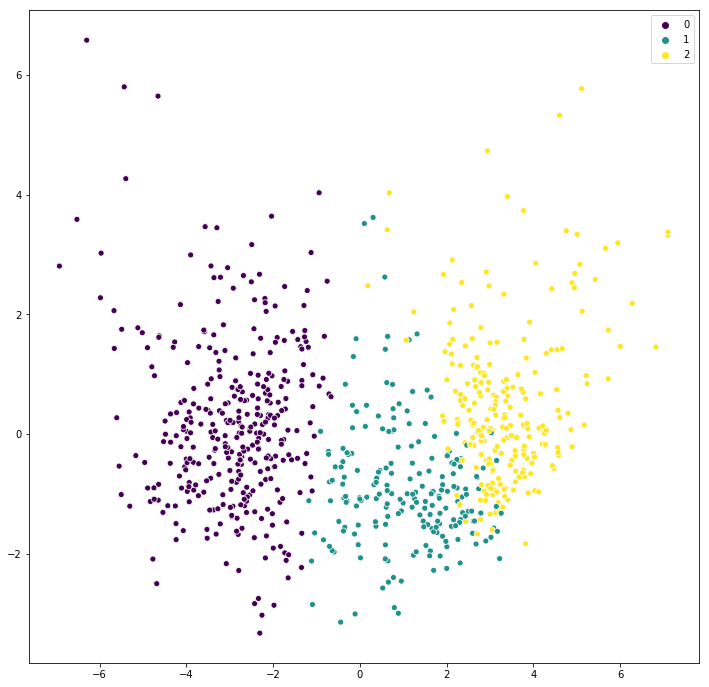

In [34]:
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1], hue=clusterer.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()

In [36]:
descr['cluster'] = clusterer.labels_
cities['cluster'] = clusterer.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
descr.groupby('cluster').mean()

,nomad_score,cost_nomad,places_to_work,friendly_to_foreigners,life_score
cluster,,,,,
0,0.739,3102.791,0.665,0.806,0.818
1,0.650,1871.141,0.580,0.800,0.680
2,0.515,1597.500,0.425,0.577,0.544


In [39]:
cities[cities.cluster == 1].sort_values('nomad_score')['place'][:10]

778            Cali
759    Johannesburg
756          Luanda
738           Accra
733           Davao
725     George Town
722    Sulaymaniyah
720             Goa
719       San Pedro
714           Batam
Name: place, dtype: object

## Gig portfolios of online freelancers

![alt text](http://sds-datacrunch/public/adult-alone-bar-1308625.jpg)

You get gig-portfolio data for 1000 online freelancers – overall ~35k gigs. Given this data can you identify professional patterns?

In [0]:
# loading the data?
data = pd.read_csv('http://sds-datacrunch.aau.dk/public/feelance_eda.csv')

In [5]:
# Quick data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34606 entries, 0 to 34605
Data columns (total 13 columns):
Unnamed: 0          34606 non-null int64
as_job_type         34606 non-null object
as_opening_title    34606 non-null object
as_total_charge     25211 non-null float64
as_total_hours      14029 non-null float64
dev_country         34606 non-null object
econ_sit            34606 non-null object
fr_continent        34606 non-null object
skls_required_no    5659 non-null float64
sub_category        34606 non-null object
tenure_d            34374 non-null float64
hour_percent        34606 non-null float64
f_id                34606 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 3.4+ MB


In [6]:
# How does one portfolio look like?
data[data.f_id == 0].sub_category

0     SEO - Search Engine Optimization
1                           Data Entry
2     SEO - Search Engine Optimization
3     SEO - Search Engine Optimization
4        SEM - Search Engine Marketing
5        SEM - Search Engine Marketing
6        SEM - Search Engine Marketing
7        SEM - Search Engine Marketing
8                  Display Advertising
9        SEM - Search Engine Marketing
10    SEO - Search Engine Optimization
11    SEO - Search Engine Optimization
12              Article & Blog Writing
13       SEM - Search Engine Marketing
Name: sub_category, dtype: object

#### Assembling gig-portfolios from a gig-list

In [0]:
# individual freelancers
workers = data.f_id.unique()

A bit some thing on loops and slightly more advanced  stuff.

the next couple of cells will show how you can 
- add stuff to lists and how to 
- work with loops

In [10]:
empty_list = []

print(empty_list)

empty_list.append(1)

print(empty_list)

empty_list.append("i don't want to be in that list")

print(empty_list)

[]
[1]
[1, "i don't want to be in that list"]


In [11]:
empty_list.append(['🙉','👽','🐼'])

print(empty_list)

[1, "i don't want to be in that list", ['🙉', '👽', '🐼']]


In [0]:
# Let's get the panda out! --> '🐼'


In [0]:
empty_list.extend(['🐧','🍅','🤘'])

print(empty_list)

In [15]:
# LOOPS

emoji_list = ['🙉', '👽', '🐼','🐧','🍅','🤘']

for some_emoji in emoji_list:
  print(50 * some_emoji)

🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉
👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽
🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼
🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧
🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅
🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘


In [21]:
# LIST COMPREHENSIONS (mini-loops in Python)

[50*x for x in emoji_list]

['🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉',
 '👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽',
 '🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼',
 '🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧🐧',
 '🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅🍅',
 '🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘']

In [0]:
#create empty list
stuff_people_do = []

for some_worker_id in workers: #initiate loop
  stuff = list(data[data.f_id == some_worker_id].sub_category) # extract portfolio for a single worker
  stuff_people_do.append((some_worker_id, stuff)) # append portfolio to the list of portfolios

In [0]:
#use pandas to make it into a datafrmae
portfolios = pd.DataFrame(stuff_people_do, columns = ['f_id', 'gig_portfolio'])

Now we are going to use Gensim (a library for Natural Language Processing) to transform these protfolio lists into BoW representations

In [0]:
# First we ceate a dicitonary - an index-subcategory mapping object

dictionary = Dictionary(portfolios['gig_portfolio'])

In [27]:
# quick check: it's as long as the number of uniques subcategories
len(dictionary)

86

In [28]:
data.sub_category.unique()

array(['SEO - Search Engine Optimization', 'Data Entry',
       'SEM - Search Engine Marketing', 'Display Advertising',
       'Article & Blog Writing', '3D Modeling & CAD', 'Web Development',
       'Web & Mobile Design', '.', 'General Translation', 'Presentations',
       'Ecommerce Development', 'Graphic Design',
       'Email & Marketing Automation', 'Other - Writing',
       'Editing & Proofreading', 'Creative Writing', 'Web Content',
       'QA & Testing', 'Web Research', 'Market & Customer Research',
       'Other - Sales & Marketing', 'Marketing Strategy', 'Copywriting',
       'Personal / Virtual Assistant', 'Other - Design & Creative',
       'Lead Generation', 'Logo Design & Branding',
       'SMM - Social Media Marketing', 'Voice Talent', 'Public Relations',
       'Photography', 'Audio Production', 'Animation',
       'Other - Accounting & Consulting', 'Other - Admin Support',
       'Academic Writing & Research', 'Mobile Development',
       'Video Production', 'Telemarke

In [29]:
len(set(data.sub_category))

86

In [0]:
# Create a "corpus of portfolios" in BoW format
corpus = [dictionary.doc2bow(sequence) for sequence in portfolios['gig_portfolio']]

In [0]:
# Transform corpus into a matrix 
portfolio_matrix = gensim.matutils.corpus2dense(corpus=corpus, num_terms=len(dictionary))

In [33]:
portfolio_matrix.shape

(86, 1000)

In [0]:
# swap rows and columns with a transponse
portfolio_matrix = portfolio_matrix.T

Why should I trust this? Can we check if all the transformations didn't mess up things?

In [35]:
# portfolio of worker 0
portfolio_matrix[0]

array([1., 1., 1., 6., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [42]:
# what's the taks sub-category of index 3?
dictionary.get(3)

'SEM - Search Engine Marketing'

In [43]:
# How many times did the worker perform this gig?
data[data.f_id == 0].sub_category

0     SEO - Search Engine Optimization
1                           Data Entry
2     SEO - Search Engine Optimization
3     SEO - Search Engine Optimization
4        SEM - Search Engine Marketing
5        SEM - Search Engine Marketing
6        SEM - Search Engine Marketing
7        SEM - Search Engine Marketing
8                  Display Advertising
9        SEM - Search Engine Marketing
10    SEO - Search Engine Optimization
11    SEO - Search Engine Optimization
12              Article & Blog Writing
13       SEM - Search Engine Marketing
Name: sub_category, dtype: object

Now we sucessfully created "Bag-of-Gigs" representations of individual workers' portfolios
The matrix is however very sparse, as we can see (many zeros and  only some non-0 values) as one would expect that.
PCA is not a good choice here. Instead we will use Non-negative Matrix Factorization (NMF), which has the tendency to very well "squash" the data into interpretable latent themes:

In Natural Language Processing, such themes are called topics and what we are going to do now is referred to as Vector Space Modelling or Topic Modelling

The coolest thing about that identified components are very interopretable. This is because the model is build on assumptions about the world related to co-occurence.

In [0]:
# Let's try to bring it all the way down to 5 dimensions

from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=0)
portfolio_matrix_reduced = model.fit_transform(portfolio_matrix)

In [67]:
# what are these components?
model.components_.shape

(5, 86)

In [0]:
# Make a dataframe
components_df = pd.DataFrame(model.components_, columns=list(dictionary.values()))

In [70]:
# Select a component
component = components_df.iloc[4,:]

# Print result of nlargest
print(component.nlargest())

General Translation      13.173
Voice Talent              1.739
Article & Blog Writing    1.365
Other - Writing           0.616
Video Production          0.387
Name: 4, dtype: float64


In [0]:
# Import clustering and dimensionality reduction
# HDBSCAN won't work with numpy < 1.16

import hdbscan
import umap

In [0]:
embedding = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(portfolio_matrix_reduced)

In [18]:
# Warning can be ignored for now

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, 
                            min_samples=50, 
                            leaf_size=40, 
                            core_dist_n_jobs=16, 
                            prediction_data=True)
clusterer.fit(embedding)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=16, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=50, min_samples=50, p=None,
    prediction_data=True)

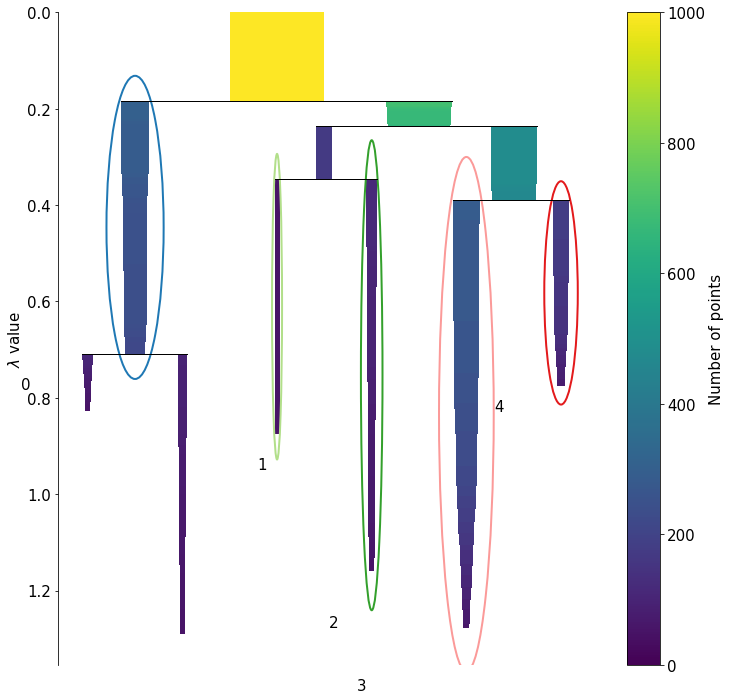

In [19]:
pal = sns.color_palette("Paired", n_colors = len(set(clusterer.labels_)))[1:]
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 15})
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=pal, label_clusters=True)

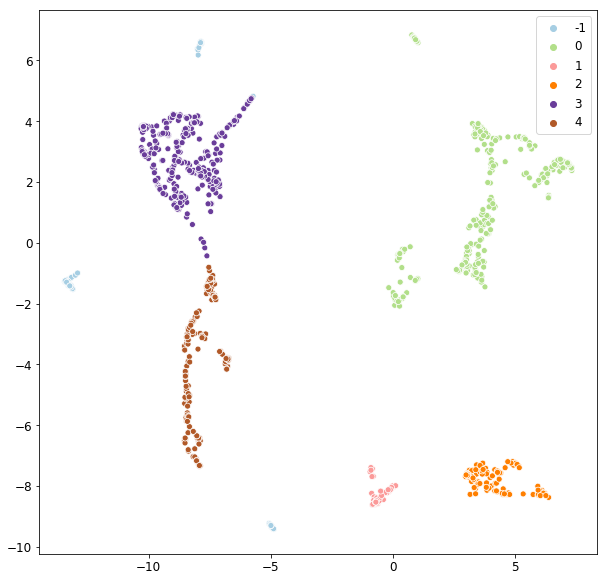

In [28]:
# Scatterplor of the UMAP embeddings with cluster-coloring
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,10))
g = sns.scatterplot(*embedding.T, 
                hue=clusterer.labels_, 
                legend='full',
                palette = 'Paired')
legend = g.get_legend()

In [0]:
portfolios['cluster'] = clusterer.labels_

In [0]:
import itertools

In [0]:
from collections import Counter

In [0]:
counter = Counter(list(itertools.chain(*portfolios[portfolios.cluster == 4]['gig_portfolio'])))

In [42]:
counter.most_common(20)

[('Graphic Design', 3266),
 ('Logo Design & Branding', 1291),
 ('Illustration', 619),
 ('Web Development', 420),
 ('Web & Mobile Design', 294),
 ('Photography', 150),
 ('Presentations', 131),
 ('Other - Design & Creative', 112),
 ('Animation', 102),
 ('Article & Blog Writing', 72),
 ('Data Entry', 69),
 ('Other - Writing', 51),
 ('Video Production', 46),
 ('Mobile Development', 46),
 ('3D Modeling & CAD', 46),
 ('.', 37),
 ('Game Development', 33),
 ('General Translation', 31),
 ('Web Content', 31),
 ('Web Research', 31)]